# Авторизация и Аутентификация пользователя через API запросы

Встроенные и поставляемые пакетом
- Session-based authentication аутентификация на основе сессий и cookies
- Token-based authentication

Дополнительные с помощью сторонних пакетов
- Json Web Token (JWT) authentication - аутентификация на основе JWT-токенов
- Django REST framework OAuth - авторизация через социальные сети

[Документация](https://www.django-rest-framework.org/api-guide/authentication/)

# Session-based authentication

Один из первых способов авторизации\аутентификации пользователей основывается на cookies браузера и сессиях сервера
Идея алгоритма
чтобы клиент был успешно идентифицирован на стороне сервера он прежде всего должен войти в систему полагая что пользователь
уже зарегистрирован для этого сервер отправляет пользователю форму логина и пароля, пользователь их вводит и клиент
отправляет данные POST запросом на сервер. Сервер ищет пользователя с указаным логином и паролем если не находит то возвращает
ошибку, а если находит то формирует идентификатор сессии в виде произвольных наборов букв и цифр заносит идентификатор в базу
данных и связывает с конкретным user_id (с конкретным пользователем из базы данных) далее эта сессия отправляется уже в бразуер
и в браузере сохраняется в так называемых cookies

Если пользователь авторизован и в браузере хранится id сессии, то он может получать доступ к определенным закрытым частям сайта
например при GET запросе прописывается строчка в которой передается session-id
```http
GET / HTTP/1.1
Authorization: Basic <session-id>
```
сервер ищет принятый id сессии и идентифицирует пользователя если такая запись будет найдена после этого дает доступ
к закрытым частям сайта. Таким образом просходит аутентификация пользователя
идентификатор сессии хранится ограниченное время и в cookies тоже
от нескольких минут до нескольких месяцев
session-id меняется если пользователь выйдет из системы
запись удаляется с таблицы и попытка зайти с этим же session-id будет безуспешной. Для того, чтобы снова зайти
нужно снова авторизироваться и получить новый session-id

# Недостаток
Пользователь привязан к устройству (к браузеру) в котором хранится как раз сессия в cookies
попытка зайти с другого браузера будет безуспешной если там нет записи в cookies

Сложно поддерживать такую авторизацию для нескольких доменных имен, поскольку куки привязываются к определенному домену

### Данная авторизация встроена в DRF

**url.py**
```python
urlpatterns = [
    path('api/v1/drf-auth/', include('rest_framework.urls')),
]
```

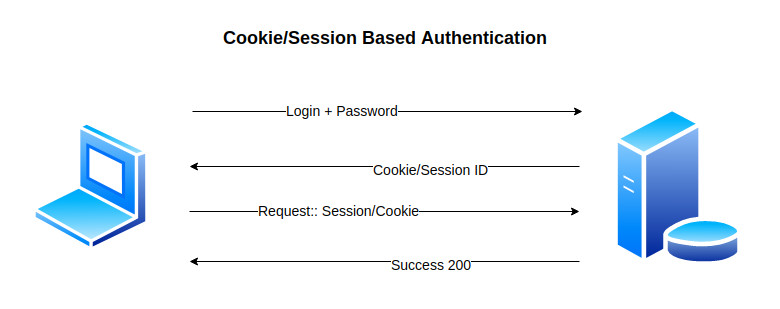